# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [21]:
# 1. Age when first married
agewed = gss['agewed']
# 2. Match the results in the code book
agewed.value_counts().sort_index()

0     35717
12        4
13       38
14      106
15      272
16      843
17     1453
18     2767
19     2886
20     2719
21     3324
22     2291
23     1980
24     1633
25     1477
26      978
27      867
28      603
29      452
30      454
31      230
32      238
33      160
34      119
35      135
36       72
37       58
38       62
39       56
40       62
41       18
42       35
43       22
44       12
45       23
46        9
47        7
48        7
49        8
50        8
51        3
52        9
53        3
54        6
55        8
56        4
57        2
58        5
59        1
60        4
61        1
62        1
63        2
65        1
68        1
70        1
73        2
90        1
98       19
99      187
Name: agewed, dtype: int64

In [25]:
# 3. I will replace these values with NaN: 98 Don't know; 99 No answer; 0 Not applicable
agewed.replace([98,99,0], np.nan, inplace=True)
agewed.value_counts().sort_index()

12.0       4
13.0      38
14.0     106
15.0     272
16.0     843
17.0    1453
18.0    2767
19.0    2886
20.0    2719
21.0    3324
22.0    2291
23.0    1980
24.0    1633
25.0    1477
26.0     978
27.0     867
28.0     603
29.0     452
30.0     454
31.0     230
32.0     238
33.0     160
34.0     119
35.0     135
36.0      72
37.0      58
38.0      62
39.0      56
40.0      62
41.0      18
42.0      35
43.0      22
44.0      12
45.0      23
46.0       9
47.0       7
48.0       7
49.0       8
50.0       8
51.0       3
52.0       9
53.0       3
54.0       6
55.0       8
56.0       4
57.0       2
58.0       5
59.0       1
60.0       4
61.0       1
62.0       1
63.0       2
65.0       1
68.0       1
70.0       1
73.0       2
90.0       1
Name: agewed, dtype: int64

In [27]:
# 4. Something I noticed: 
# - Mean age when first married is 22. 
# - Youngest age of marriage shown in this dataset is 12
# - While oldest age of marriage is 90!
agewed.describe()

count    26543.000000
mean        22.150058
std          4.885114
min         12.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         90.000000
Name: agewed, dtype: float64

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

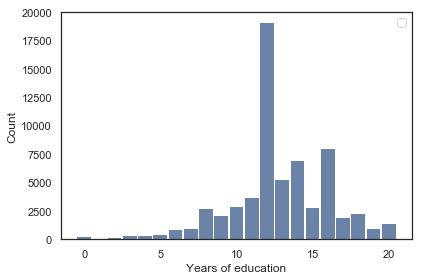

In [28]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

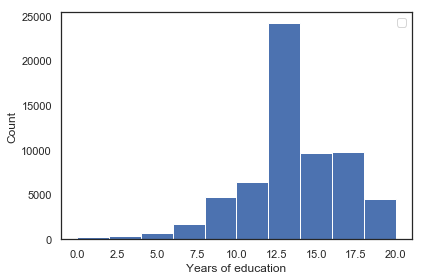

In [29]:
import matplotlib.pyplot as plt

# 1. The matplotlib's hist function uses a small bin size as default, 
# which results in wider columns. It's hard to intepret the data as the
# column's width in this case is about 2.5 years of education.
plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

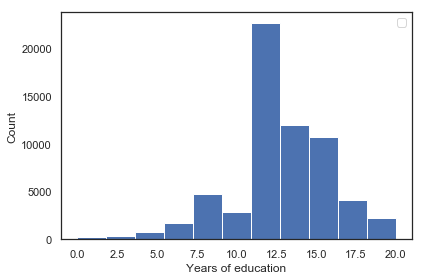

In [30]:
# 2. Now, we have 11 bins corresponding to 11 columns.
# The column's width decreases, which changed the overall
# shape of the visualization of distribution. Compared to 
# the previous graph, the peak column decreases in height,
# as it gets smoothed out by neighboring columns.
plt.hist(gss.educ.dropna(), bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count')

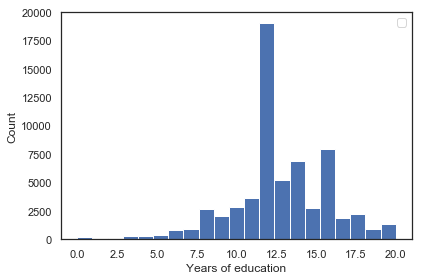

In [36]:
# 3. With 21 bins, the columns look much thinner.
# Using an appropriate bin's size helps us gain
# more useful information about the distribution.
plt.hist(gss.educ.dropna(), bins=21)
decorate(xlabel='Years of education', 
         ylabel='Count')

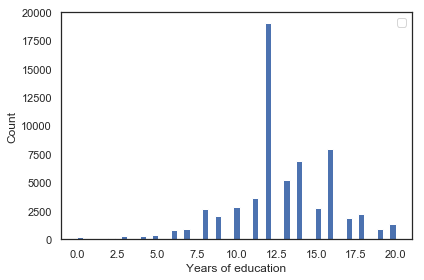

In [38]:
# 3. With higher bin's size (like 51 in this case), 
# it's hard to interpret the data. The visualization
# does not give us any useful information.
plt.hist(gss.educ.dropna(), bins=51)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

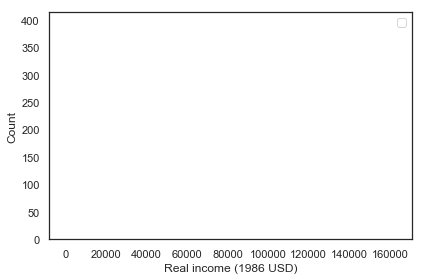

In [39]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

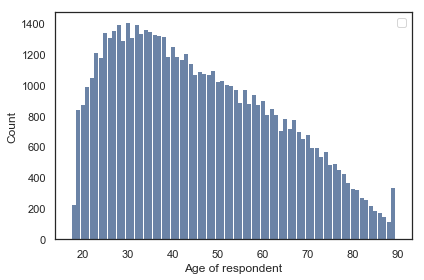

In [40]:
# 1. Make and plot a Hist of age 
hist_age = Hist(gss.age)
thinkplot.hist(hist_age)
decorate(xlabel='Age of respondent', 
         ylabel='Count')

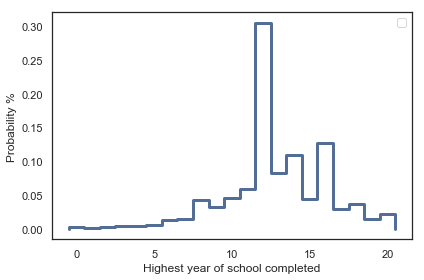

In [80]:
# 2. Make and plot a Pmf of educ
pmf_educ = Pmf(gss.educ)
thinkplot.Pmf(pmf_educ)
decorate(xlabel='Highest year of school completed', 
         ylabel='Probability %')

In [51]:
# 3. Fraction of people have 
pmf_educ[12] # 12 years of education

0.3051114107750594

In [52]:
pmf_educ[14] # 14 years of education

0.10991780645989853

In [53]:
pmf_educ[16] # 16 years of education

0.12722339947344763

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

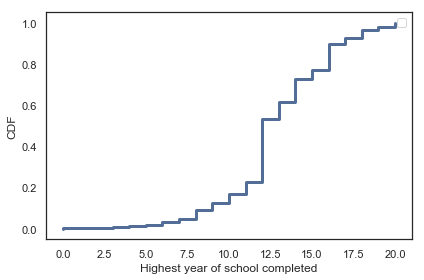

In [78]:
# 1. Make and plot a Cdf of educ
cdf_educ = Cdf(gss.educ)
thinkplot.Cdf(cdf_educ)
decorate(xlabel='Highest year of school completed', 
         ylabel='CDF')

In [76]:
# 2. Fraction of people have <= 12 years of education
less_or_equal_12 = cdf_educ[12]
less_or_equal_12

0.5327008283567713

In [77]:
# Fraction of people have > 12 years of education
more_than_12 = 1 - less_or_equal_12
more_than_12

0.46729917164322865

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

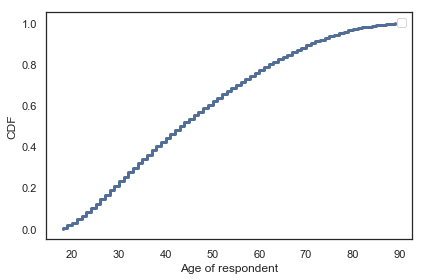

In [83]:
# 1. Make and plot a Cdf of age
cdf_age = Cdf(gss.age)
thinkplot.Cdf(cdf_age)
decorate(xlabel='Age of respondent', 
         ylabel='CDF')

In [85]:
# 2. Median age
cdf_age.Percentile(50)

44.0

In [110]:
# 2. Inter-quartile range (IQR)
cdf_age.Percentile(25), cdf_age.Percentile(75)

(31.0, 59.0)

In [111]:
abs(cdf_age.Percentile(25) - cdf_age.Percentile(75))

28.0

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

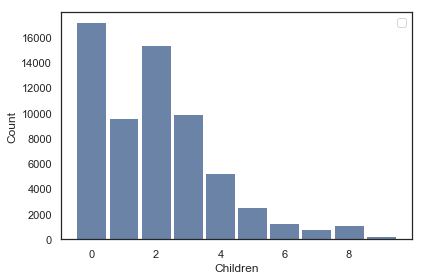

In [122]:
# Hist of childs
hist_childs = Hist(gss.childs)
thinkplot.Hist(hist_childs)
decorate(xlabel='Children', 
         ylabel='Count')

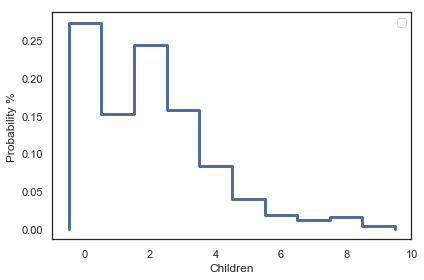

In [123]:
# PMF of childs
pmf_childs = Pmf(gss.childs)
thinkplot.Pmf(pmf_childs)
decorate(xlabel='Children', 
         ylabel='Probability %')

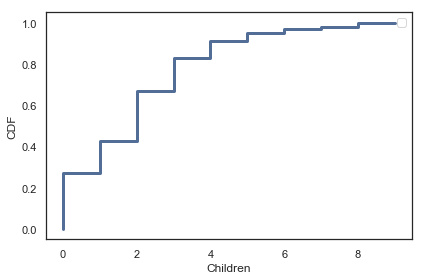

In [126]:
# CDF of childs
cdf_childs = Cdf(gss.childs)
thinkplot.Cdf(cdf_childs)
decorate(xlabel='Children', 
         ylabel='CDF')

In [127]:
# Median number of children in a family
cdf_childs.Percentile(50)

2

In [128]:
# Max number of children in a family
cdf_childs.Percentile(100)

9

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [112]:
# 1. Compute CDF of realinc for male and female respondents
realinc_male = gss.realinc[gss.sex == 1]
cdf_realinc_male = Cdf(realinc_male, label='male')
realinc_female = gss.realinc[gss.sex == 2]
cdf_realinc_female = Cdf(realinc_female, label='female')

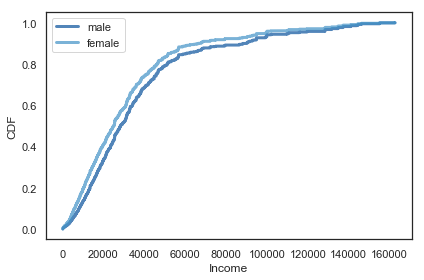

In [113]:
# Plot CDFs on the same axes
thinkplot.PrePlot(2) 
thinkplot.Cdfs([cdf_realinc_male, cdf_realinc_female])
decorate(xlabel='Income', 
         ylabel='CDF')

In [115]:
# 2. Difference in median income between the two groups
cdf_realinc_male.Percentile(50), cdf_realinc_female.Percentile(50)

(28490.0, 24937.0)

In [134]:
cdf_realinc_male.Percentile(50) - cdf_realinc_female.Percentile(50)

3553.0

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [130]:
# Compute CDF of realinc for black and white respondents
realinc_black = gss.realinc[gss.race == 2]
cdf_realinc_black = Cdf(realinc_black, label='black')
realinc_white = gss.realinc[gss.race == 1]
cdf_realinc_white = Cdf(realinc_white, label='white')

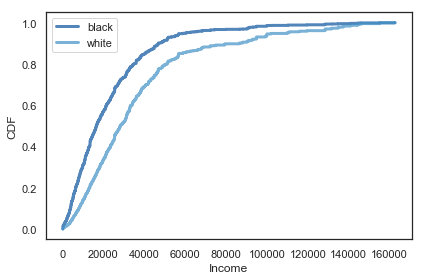

In [131]:
# Plot CDFs on the same axes
thinkplot.PrePlot(2) 
thinkplot.Cdfs([cdf_realinc_black, cdf_realinc_white])
decorate(xlabel='Income', 
         ylabel='CDF')

In [138]:
# Difference in median income between the two groups
cdf_realinc_black.Percentile(50), cdf_realinc_white.Percentile(50)

(16604.5, 28490.0)

In [139]:
cdf_realinc_black.Percentile(50) - cdf_realinc_white.Percentile(50)

-11885.5

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [91]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [93]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

'rm' is not recognized as an internal or external command,
operable program or batch file.


Load it and see how fast it is!

In [94]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 46 ms


(62466, 101)